**Preprocessing - EEG signal**

In this file there is shown preprocessing of EEG signal measured on 64 channels. Preprocessing is a crucial sten before starting analysis or futher research on the signal. The package which was used is "mne" and can be download form web page https://mne.tools/stable/index.html. 

We will focus on further steps: 

- Deleting bad channels. Bad channels can result from a cap shift (usually due to muscle contraction or the participant scratching their head) resulting in the gel not forming a good connection between scalp and  electrode, sweat or poor gelling of the cap. That is why, bad channels should be deleted. Another way of deal with bad channel is interpolation.
- Re-referencing. Sometimes it is called also the offine reference. The idea is to express the voltage at the EEG scalp channels with respect to another, new reference. It can be composed of any recorded channel or an average of several channels. 
- Filtering. Removing very high and very low frequencies that are unlikely to contain the signal that is relevant to us. Low-pass filter was set 0.1 Hz and high-pass filter 80 Hz.

Preprocessing steps are based on: http://learn.neurotechedu.com/preprocessing/.


In [1]:
pip install -U mne

Requirement already up-to-date: mne in c:\users\ola\anaconda3\lib\site-packages (0.20.4)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import mne

**Loading data**

In [27]:
raw1_1=mne.io.read_raw_brainvision(r"C:\Users\Ola\Desktop\EEG-internship\EEG_Trauma_Baseline\Trauma1_1.vhdr",preload=False)
raw1_2=mne.io.read_raw_brainvision(r"C:\Users\Ola\Desktop\EEG-internship\EEG_Trauma_Baseline\Trauma_1_2.vhdr",preload=False)

#print(raw1_1)
#print(raw1_2)

Extracting parameters from C:\Users\Ola\Desktop\EEG-internship\EEG_Trauma_Baseline\Trauma1_1.vhdr...
Setting channel info structure...


<ipython-input-27-3dc22194c263>:1: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw1_1=mne.io.read_raw_brainvision(r"C:\Users\Ola\Desktop\EEG-internship\EEG_Trauma_Baseline\Trauma1_1.vhdr",preload=False)


Extracting parameters from C:\Users\Ola\Desktop\EEG-internship\EEG_Trauma_Baseline\Trauma_1_2.vhdr...
Setting channel info structure...


<ipython-input-27-3dc22194c263>:2: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw1_2=mne.io.read_raw_brainvision(r"C:\Users\Ola\Desktop\EEG-internship\EEG_Trauma_Baseline\Trauma_1_2.vhdr",preload=False)


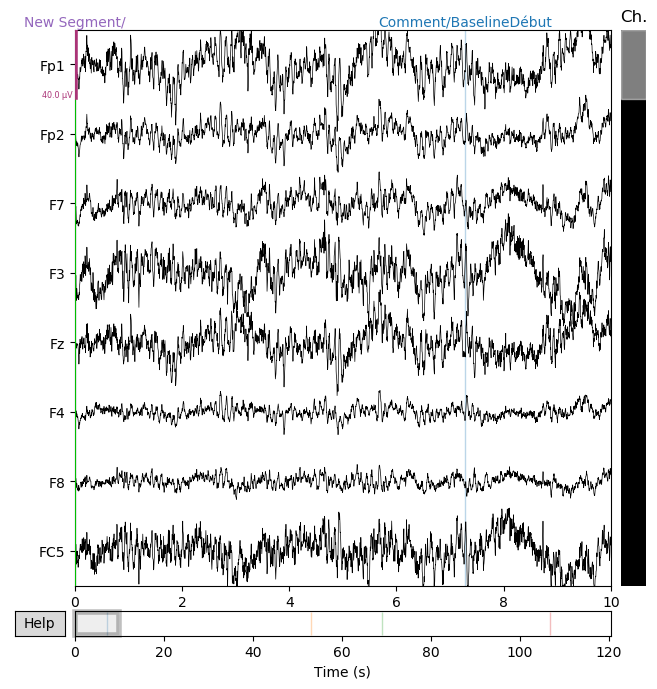

In [28]:
%matplotlib qt
raw1_1.plot(n_channels=8)
raw1_2.plot(n_channels=8)

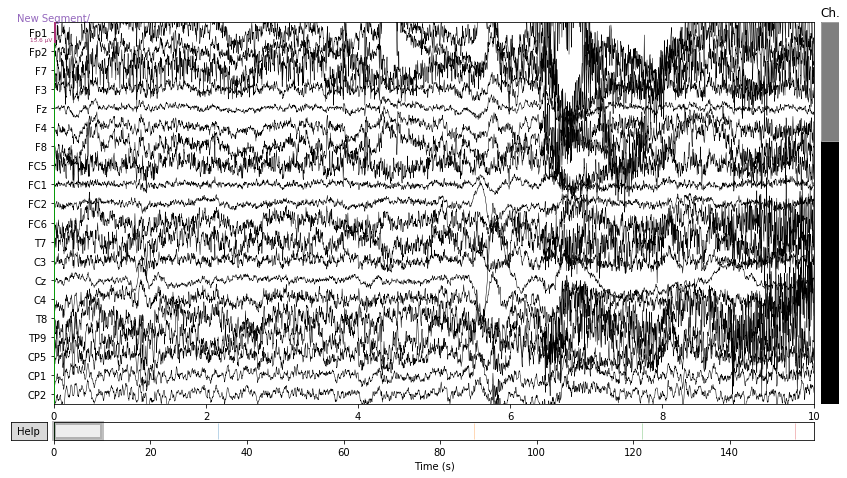

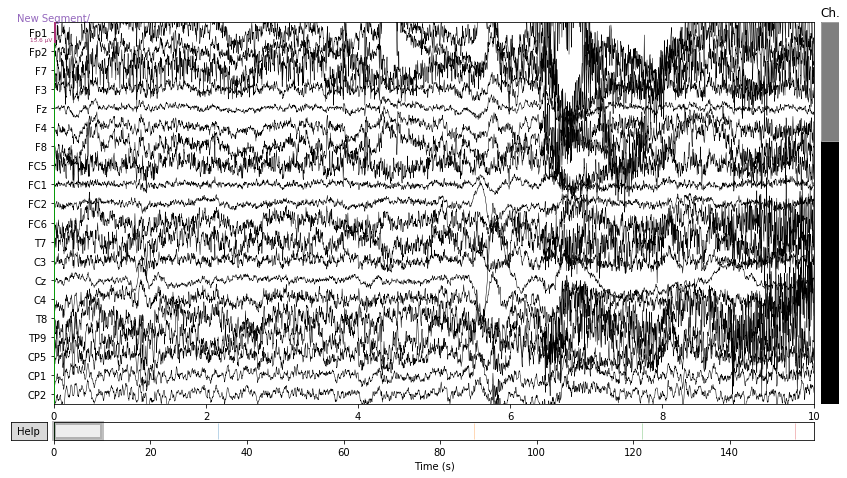

In [5]:
raw1_1.plot(scalings = 'auto', start=0)

**Filtering**

Removing very high and very low frequencies that are unlikely to contain the signal that is relevant to us. 

Low-pass filter: 0.1 Hz.

High-pass filter: 80 Hz.

In [6]:
raw1_1.load_data()
raw1=raw1_1.filter(l_freq=0.1, h_freq=80)

Reading 0 ... 393749  =      0.000 ...   157.500 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 80 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 80.00 Hz
- Upper transition bandwidth: 20.00 Hz (-6 dB cutoff frequency: 90.00 Hz)
- Filter length: 82501 samples (33.000 sec)



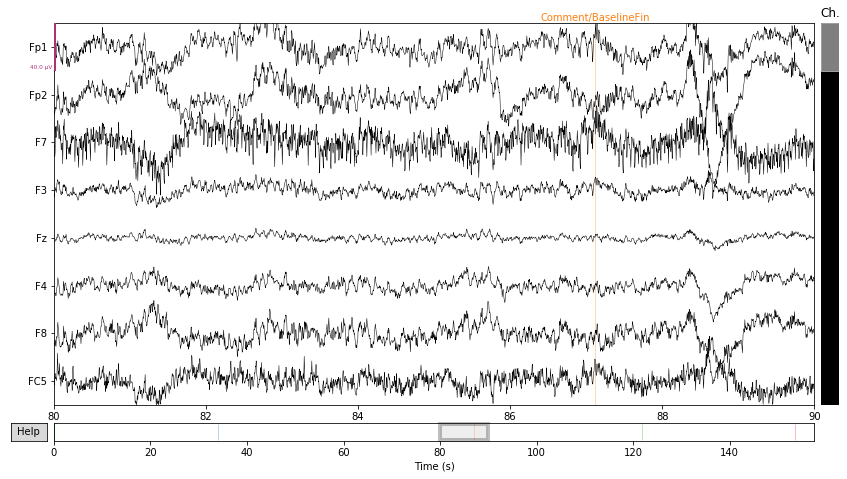

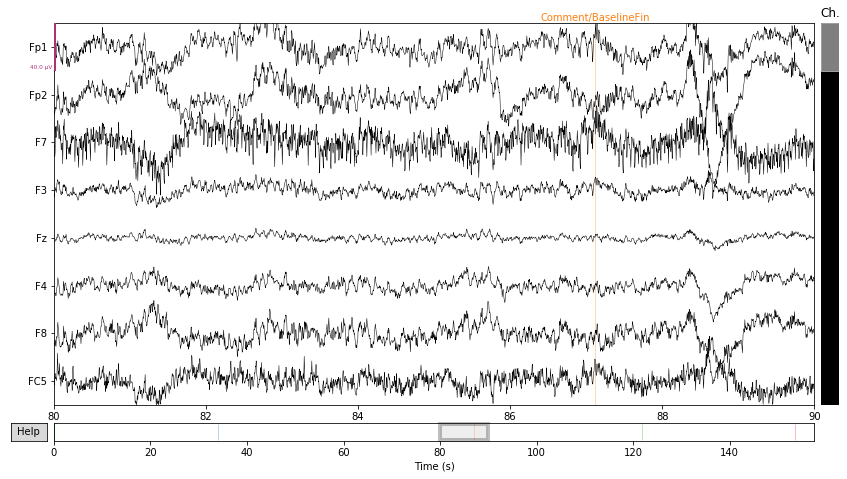

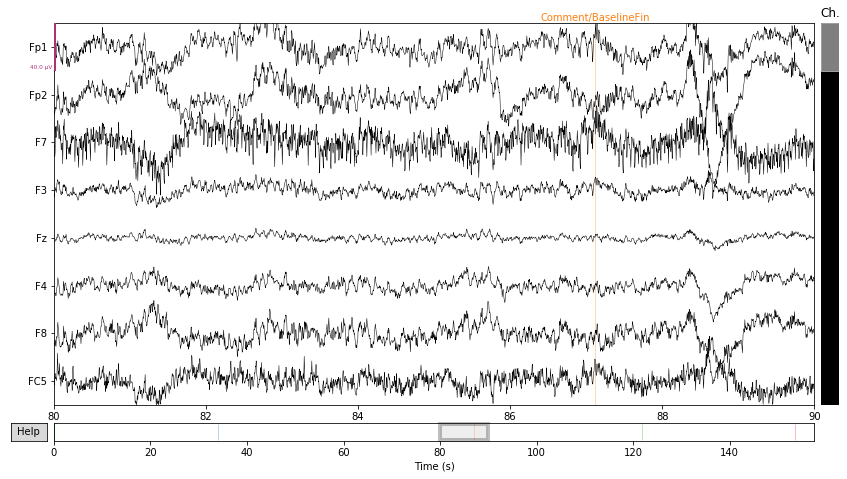

In [7]:
raw1_1.plot(n_channels=8, start=80)
raw1.plot(n_channels=8, start=80)

**Re-reference**

Using the average of all channels as reference.

Source: https://mne.tools/stable/auto_tutorials/preprocessing/plot_55_setting_eeg_reference.html#sphx-glr-auto-tutorials-preprocessing-plot-55-setting-eeg-reference-py

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.


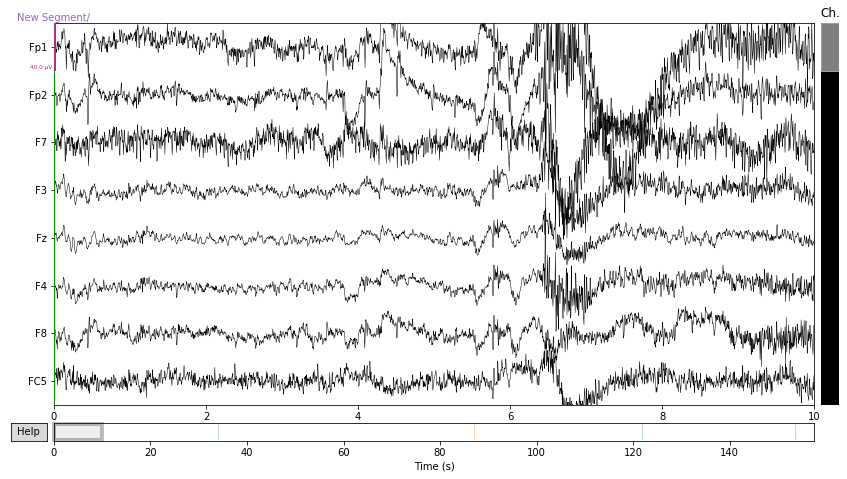

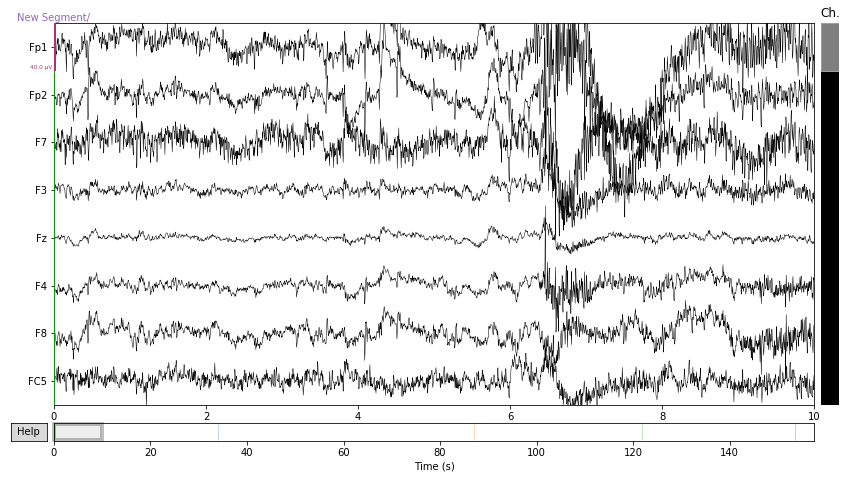

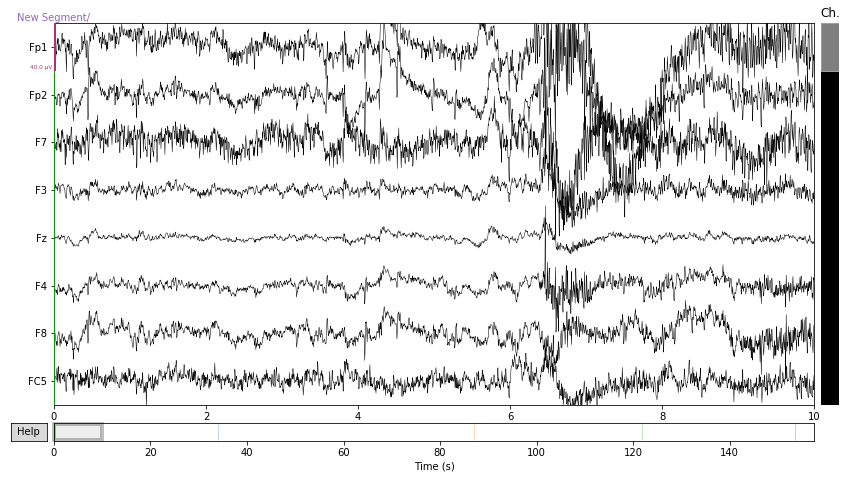

In [8]:
raw2 = raw1.copy().set_eeg_reference(ref_channels='average')
raw2.plot(n_channels=8)
raw1.plot(n_channels=8)

**Power spectral density plot**

Power spectral density plot of our data

Effective window size : 0.819 (s)


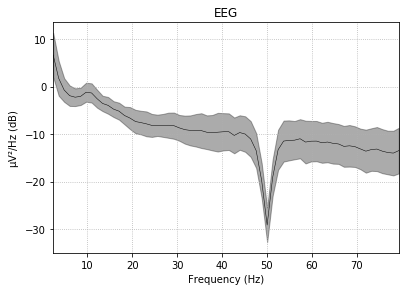

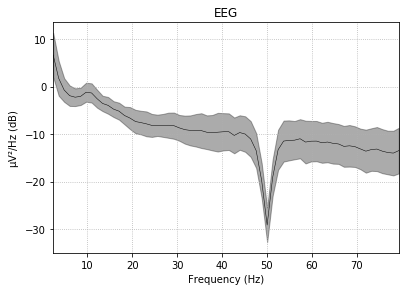

In [21]:
raw2.plot_psd(tmin=0, tmax=60, fmin=2, fmax=80, average=True, spatial_colors=False)

Removing power line noise at 50 Hz

In [22]:
raw2.notch_filter(50)

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 16501 samples (6.600 sec)



<RawBrainVision | Trauma1_1.eeg, 64 x 393750 (157.5 s), ~192.3 MB, data loaded>

Effective window size : 0.819 (s)


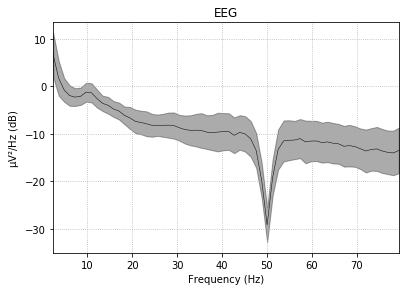

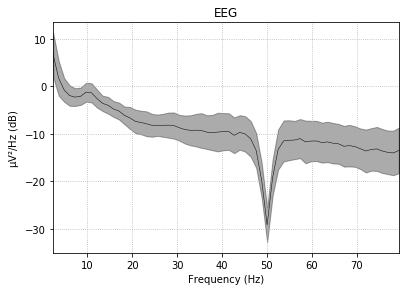

In [25]:
raw2.plot_psd(tmin=0, tmax=60, fmin=2, fmax=80, average=True, spatial_colors=False)